# Stat 165/265 Homework 2 Lab: Proper and Improper Scoring Rules

Scoring rules, or score functions, measure how good a probabilistic forecast is. As we saw in lecture, generally we want to use strictly proper scoring rules to compare forecasts, in order to extract people's true beliefs. This notebook will touch on a couple different scoring rules, both proper and improper, to explore how they differ and how improper rules can be "gamed."

## Gradescope Submission
To submit this assignment, rerun the notebook from scratch (by selecting Kernel > Restart & Run all), and then print as a pdf (File > download as > pdf) and submit it to Gradescope.


**This assignment should be completed and submitted before Tuesday, February 4th, 2025 at 11:59 PM**

# I. Naive Linear Score

Imagine we have a biased coin that has a 60% chance of Heads and 40% chance of Tails and we ask forecasters to give a probability distribution for the outcome of the coin flip, i.e. a vector $q = (q_H, q_T)$ where $q_H + q_T = 1$. As mentioned in lecture, here's a simple linear score $f$ we could define:

$$f(q, i) = q_i$$

or in other words, you get $q_H$ points if the coin lands Heads and $q_T$ points if the coin lands Tails. To get a feel for this score, we've implemented an interactive widget below that outputs your average score over many coin flips, when you input a forecast for the probability of heads. Try it out for a few different forecasts and numbers of flips.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import ipywidgets as widgets

In [94]:
def submit_forecast(heads_forecast, num_flips):
    flips = np.random.rand(num_flips)
    heads = (flips < 0.6).sum()
    tails = num_flips - heads
    avg_score = (heads_forecast * heads + (1 - heads_forecast) * tails)/num_flips
    return (f"Score over {num_flips} coin flips: ", avg_score)

In [95]:
game = interact_manual(submit_forecast,
                       heads_forecast=widgets.FloatSlider(min=0, max=1, step=.01, value=.5),
                       num_flips=widgets.IntSlider(value=50))
game;

interactive(children=(FloatSlider(value=0.5, description='heads_forecast', max=1.0, step=0.01), IntSlider(valu…

Over many coin flips, we can compute the expected score for any given vector $q$, which we've implemented below.

In [96]:
# Here we define a helper function to make sure that we're only working with valid probability distributions
def check_distributions(q, true_dist):
    assert(np.sum(q) == 1 and np.sum(true_dist) == 1), "Probabilities must sum to 1."
    assert(len(q) == len(true_dist))

In [97]:
def expected_linear_score(q, true_dist):
    check_distributions(q, true_dist)

    return np.dot(q, true_dist)

If you know that the coin is biased 60-40, and you want to get the highest score according to this linear score, what forecast should you give as your $q$? You could report $q = (0.6, 0.4)$ and we see that this gives an expected score of 0.52. Can you find a $q$ that does better than this?

In [98]:
biased_coin = (0.6, 0.4)

q = (0.6, 0.4)
expected_linear_score(q, biased_coin)

0.52000000000000002

### Q1. What's the optimal $q$ for this naive linear score and what score does it get?

In [99]:
from datascience import *

lin_score = make_array()
for p in np.arange(0, 1.01, 0.05):
    q = (p, (1 - p))
    lin_score = np.append(lin_score, expected_linear_score(q, biased_coin))
lin_score_table = Table().with_columns(
    "P_Head", np.arange(0, 1.01, 0.05),
    "Lin score", score)
lin_score_table.sort("Lin score", descending=True).show(np.count_nonzero(lin_score_table.column("Lin score") >= 0.52))

P_Head,Lin score
1,0.6
0.95,0.59
0.9,0.58
0.85,0.57
0.8,0.56
0.75,0.55
0.7,0.54
0.65,0.53
0.6,0.52


For all q with the first item > 0.6, we have a better expected score than 0.52. The more the probability of head the more the expected score.  

### Q2. Plot the naive linear score for all possible forecasts $q$. Is the naive linear score a proper scoring rule? Explain why or why not.

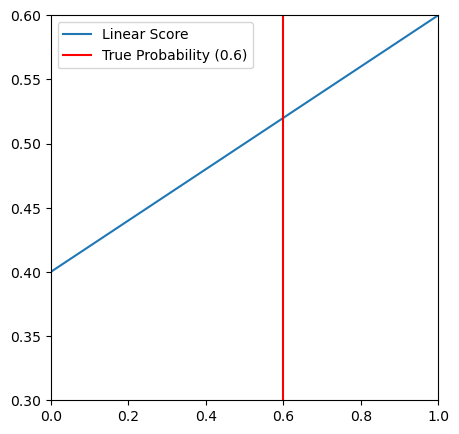

In [100]:
plt.figure(figsize=(5,5))
plt.xlim(0, 1)
plt.ylim(0.3, 0.6)

plt.plot(lin_score_table.column("P_Head"), lin_score_table.column("Lin score"), label="Linear Score") 
plt.axvline(0.6, color='red', label="True Probability (0.6)")
plt.legend()
plt.show()

The Naive Linear Score isn't a proper score rule as it doesn't maximize when the forecast matches the probability.

# II. Logarithmic Score

As we saw in lecture, Good's logarithmic scoring rule is defined as:

$$f(q, i) = \log(q_i)$$

We've implemented a function to calculate the expected logarithmic score of a coin flip forecast below. Again, a higher score is better.

In [101]:
def expected_log_score(q, true_dist):
    check_distributions(q, true_dist)
    assert(min(q) > 0 and min(true_dist) > 0), "Choose nonzero probabilities" # avoid undefined scores

    return np.dot(np.log(q), true_dist)

We'll continue using the biased coin that lands Heads 60% of the time.

In [102]:
q = (0.999, 0.001)
expected_log_score(q, biased_coin)

-2.7637024117930049

### Q3. What's the logarithmic score for $q = (0.2, 0.8)$? For $q = (0.5, 0.5)$? For $q = (0.999, 0.001)$?

q = (0.2, 0.8) == -1.054920167986144;
q = (0.5, 0.5) == -0.69314718055994529;
q = (0.999, 0.001) == -2.7637024117930049

### Q4. Plot the logarithmic score for all possible forecasts $q$.

In [115]:
log_score = make_array()
for p in np.arange(0.01, 1.00, 0.001):
    q = (p, (1 - p))
    log_score = np.append(log_score, expected_log_score(q, biased_coin))
log_score_table = Table().with_columns(
    "P_Head", np.arange(0.01, 1.00, 0.001),
    "Log score", log_score)
log_score_table.show(5)

P_Head,Log score
0.01,-2.76712
0.011,-2.71034
0.012,-2.65854
0.013,-2.61092
0.014,-2.56686


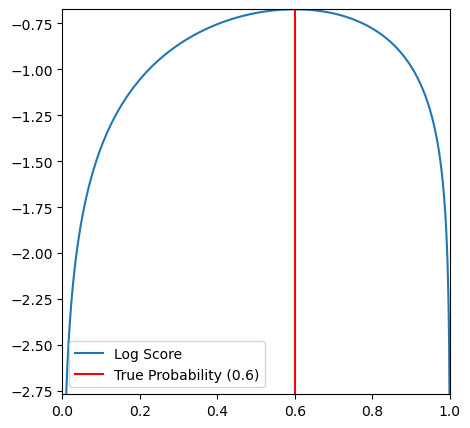

In [116]:
plt.figure(figsize=(5,5))
plt.xlim(0, 1)
plt.ylim(min(log_score_table.column("Log score")),max(log_score_table.column("Log score")))

plt.plot(log_score_table.column("P_Head"), log_score_table.column("Log score"), label="Log Score") 
plt.axvline(0.6, color='red', label="True Probability (0.6)")
plt.legend()
plt.show()

Your answer here.

### Q5. What's the optimal $q$ for the logarithmic score, when forecasting the biased coin? Is the logarithmic score a proper scoring rule?

The optimal q is 0.6. With logarithmic score, the optimal q is the same as the probability. We can therefore say that the logarithmic score is a proper scoring rule as it maximizes the forecast when q = p.

# III. Brier's Quadratic Score

Also seen in lecture, Brier's quadratic scoring rule is defined as:

$$f(q, i) = -\sum_{j=1}^n (q_j - o_{ij})^2 $$

where $o_{ij} = 1$ if $i = j$ and 0 otherwise. This expression can be equivalently written as:

$$f(q, i) = 2q_i - 1 - \sum_{j=1}^n q_j^2$$

### Q6. Implement the function `expected_quad_score` below to calculate the expected quadratic score given a forecast and a true distribution.

In [105]:
def expected_quad_score(q, true_dist):
    check_distributions(q, true_dist)

    score = -sum((q_i - p_i) ** 2 for q_i, p_i in zip(q, true_dist))

    return score

### Q7. Plot the quadratic score for all possible forecasts for the biased coin.

In [106]:
quad_score = make_array()
for p in np.arange(0.0, 1.01, 0.05):
    q = (p, (1 - p))
    quad_score = np.append(quad_score, expected_quad_score(q, biased_coin))
quad_score_table = Table().with_columns(
    "P_Head", np.arange(0.0, 1.01, 0.05),
    "Quad score", quad_score)
quad_score_table.show(5)

P_Head,Quad score
0,-0.72
0.05,-0.605
0.1,-0.5
0.15,-0.405
0.2,-0.32


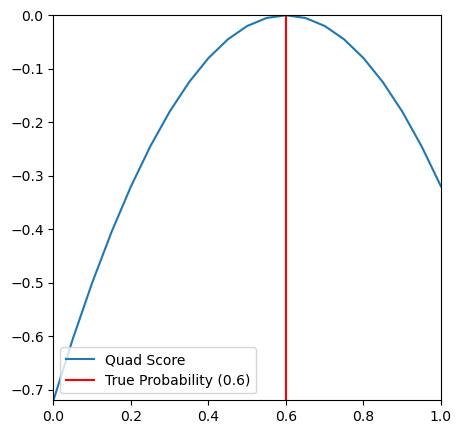

In [107]:
plt.figure(figsize=(5,5))
plt.xlim(0, 1)
plt.ylim(min(quad_score_table.column("Quad score")),max(quad_score_table.column("Quad score")))

plt.plot(quad_score_table.column("P_Head"), quad_score_table.column("Quad score"), label="Quad Score") 
plt.axvline(0.6, color='red', label="True Probability (0.6)")
plt.legend()
plt.show()

We see that q is also maximizes at 0.6 so when = probability. We can therefore conclude that the quadratic score is also a proper scoring rule.

# IV. Logarithmic vs. Quadratic Scoring Rules

### Q8. Rare events.
Imagine you and your friend Alice are competing to see who is the better forecaster. You know that you are generally better than Alice at being precise about the probabilities of rare events -- for example, once something is rarer than a 1 in 100 chance, Alice treats that as having a 1 in 100 probability, while you are good at differentiating between things that are 1 in 100 and those that are 1 in a 10 thousand. **If you want a forecasting competition to show your advantage on this, would you rather have the scoring rule be logarithmic or quadratic? Why?**


In this case, I would prefer a logarithmic scoring rule as it penalizes more the misestimation of small probabilities. With the quadratic scoring rule, my accurates small probabilities predictions wouldn't be as much rewarded. Looking at the chart we made above, this assumption makes sense.

### Q9. Precision in the middle

Now imagine you are competing against your friend Bob. He's quite good at estimating rare event probabilities. However, you notice that when an two things both have substantial probabililty of happening, he tends to just forecast 50%, while you are good at evaluating considerations that push you to make more precise forecasts, such as 42-58. **Would you rather compete with Bob on a log score or quadratic score? Why?**

In this case, I would prefer a quadratic scoring rule, as the logarthmic scoring rule will more penalizes the misestimation of small probabilities while the quadratic rule penalizes the overall calibration of predictions. Looking at the chart we made above, this assumption makes sense.

### Q10. More than two options

Imagine you are forecasting which of the Final Four teams (Teams A, B, C, and D) in a tournament will be the champion. You believe the teams chances are, in order: 5%, 10%, 60%, 25%. You submit this forecast, and Team C wins, so you are pretty happy you put a high probability on that outcome! Then you learn that someone else who also put a 60% chance on Team C got a higher quadratic score than you. **How is this possible? Give an example of a forecast that would beat your quadratic score.**

In [108]:
# Let's compute our score with this prediction
my_prediction = -sum([(0.05-0)**2, (0.1-0)**2, (0.6-1)**2, (0.25-0)**2]) 
my_prediction

-0.23500000000000004

We can see now that our prediction is accurate but the quadratic scoring rule will be more rewarding for a prediction which balances more the chances of winning between all the options.

In [109]:
# Let's compute another score with minimal predictions for other teams
other_prediction = -sum([(0.15-0)**2, (0.15-0)**2, (0.6-1)**2, (0.1-0)**2]) 
other_prediction

-0.21500000000000002

Therefore, the quadratic scoring rule rewards the overall prediction and not only choosing the right winner. The more the difference between your higher prediction chances with other predictions, the more you'll be rewarded. Therefore when using a quadratic score rule with more than 2 options, you should balance your probabilities between all the possible options apart from your main forecast to maximize your quadratic score.

### Submission

Follow the instructions at the top, which detail how to submit this notebook to Gradescope.